In [36]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [37]:
#General parameters
years = 16
dt = 15
time = int(261 * years)

#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "constant_timesteps"
#mode = "constant_gain"


#Tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = 20
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.025
tax_allowance = 1000

initial_investment = 5000
saving_plan = 500
saving_plan_period = 22


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_investment=initial_investment, saving_plan=saving_plan, saving_plan_period=saving_plan_period,  dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, phase = sim.simulate_performance()

buy_and_hold_performance = sim.buy_and_hold(set='simulation')[0]
random_swing_performance_analyse = sim.random_swing_trade_ana(set='simulation')[0]
swing_performance_analyse = sim.swing_trade_ana(set='simulation')[0]

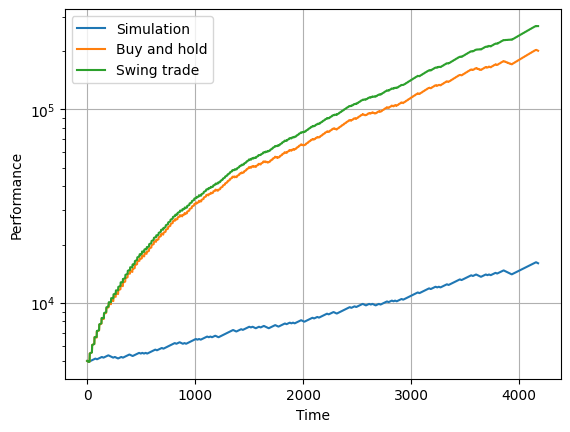

Initial invetment:  5000
Total Investment:  99500

Index performance:
    Absolute: 16002.196, Relative: 3.2
    Yearly performance: 1.075

Buy and hold return:
    Absolute: 200829.064, Relative: 2.018
    Yearly performance: 1.045, Internal rate of return: 1.079
    Taxes: 0, Transaction cost: 388.62

Swing trade return:
    Absolute: 269363.089, Relative: 2.707
    Yearly performance: 1.064, Internal rate of return: 1.11
    Taxes: 4217.635, Transaction cost: 10313.508

Random swing trade return:
    Absolute: 108153.911, Relative: 1.087
    Yearly performance: 1.005, Internal rate of return: 1.01
    Taxes: 633.16, Transaction cost: 22077.433

Best return:  34602.671


In [38]:
plt.plot(performance, label="Simulation")
plt.plot(buy_and_hold_performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade")
#plt.plot(random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()


#sim.print_parameters()
sim.print_results(accuracy=3)
#sim.plot_performance()

In [4]:
mc = MonteCarloSimulation(chartsim=sim, parallel=True)
_ = mc.mc_artificial_chart(n=500)

# mc.hist_performance(bins=30)

100%|██████████| 500/500 [00:37<00:00, 13.39it/s]


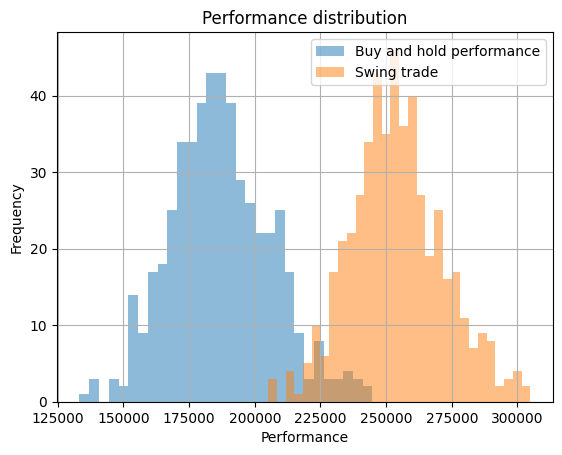

Initial invetment:  5000
Total money invested:  99500

Index performance:
  Overall return: 15121.567 +/- 2330.214 (Median: 14901.146)
  Yearly performance: 1.071 +/- 0.01 (Median: 1.071)

Buy and hold return:
  Overall return: 187139.062 +/- 19175.487 (Median: 186331.195)
  Yearly performance: 1.04 +/- 0.007 (Median: 1.04)
  Internal rate of return: 1.071 +/- 0.011 (Median: 1.071)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 388.62 +/- 0.0 (Median: 388.62)

Swing trade return:
  Overall return: 254109.198 +/- 17577.408 (Median: 253021.965)
  Yearly performance: 1.06 +/- 0.005 (Median: 1.06)
  Internal rate of return: 1.103 +/- 0.007 (Median: 1.103)
  Taxes: 3710.866 +/- 442.076 (Median: 3702.306)
  Transaction cost: 11637.856 +/- 922.979 (Median: 11623.443)

Random swing trade return:
  Overall return: 104555.016 +/- 5426.968 (Median: 104443.062)
  Yearly performance: 1.003 +/- 0.003 (Median: 1.003)
  Internal rate of return: 1.006 +/- 0.006 (Median: 1.006)
  Taxes: 588.6 +/

In [5]:


bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)